# Using a 6 pairs of layer and annotations, 2 pairs from 3 paitients each.
- try to vizualize the 6 images using the same code
- crop the images
- read the annotations
- overlay the annotations over the images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import cv2


In [3]:
def crop_image(img_dir)->str:
    '''
    Image cropped from left to right to have a width of 768 pixels.
    The image is cropped from the bottom up to the first row with non-black pixels.
    arg: 
            img_dir (str): The file path to the image to crop.
    return: 
            cropped_img (numpy.ndarray): The cropped image.
    '''
    img = cv2.imread(img_dir)
    gray = img
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # annotation region starts at x=0 and ends at x=767 (adjust as needed)
    x_end = gray.shape[1]           # rightmost pixel
    x_start = x_end - 767 
    y_start = 0
    y_end = gray.shape[0]  # full height for now

    # Crop image
    X_cropped_img = gray[y_start:y_end, x_start:x_end]

    gray = X_cropped_img
    x_start_crop = 200
    x_end_crop = 400

    # Scan from bottom up to find the first row with non-black pixels in the x-range
    for y in range(gray.shape[0] - 1, -1, -1):
        row_pixels = gray[y, x_start_crop:x_end_crop]
        if np.any(row_pixels > 10):  # threshold for "not black"
            bottom_crop = y + 1  # +1 to include the first non-black row
            break
    else:
        bottom_crop = gray.shape[0]  # fallback: no gray found

    # Crop the image from the top to bottom_crop
    Y_cropped_img = gray[0:bottom_crop, :]

    return Y_cropped_img


In [4]:
def plot_layer_annotations_on_image(img, lyr_dir, bscan_idx=0, min_annotation=60000, max_annotation=1963636):
    """
    Plots retinal layer annotations over a B-scan image.

    Args:
        img_path (str): Path to the cropped B-scan image.
        lyr_dir (str): Path to the annotation .xls/.csv file.
        bscan_idx (int): Index of the B-scan to plot (default: 0).
        min_annotation (float): Minimum annotation value for scaling (default: 60000).
        max_annotation (float): Maximum annotation value for scaling (default: 1963636).
    """
    import cv2
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Load the cropped image

    #img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Load annotation data
    if lyr_dir.endswith('.xls') or lyr_dir.endswith('.xlsx'):
        data = pd.read_csv(lyr_dir, sep=None, engine='python')
    else:
        data = pd.read_csv(lyr_dir)


    layers = ['ILM', 'NFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE', 'BM']
    row_idx = 1 + (bscan_idx * 34)
    start_row = row_idx + 2
    layer_rows = [start_row + i * 3 for i in range(len(layers))]

    plt.figure(figsize=(15, 10))
    plt.imshow(img, cmap='gray', alpha=0.8)
    colors = plt.cm.tab10(np.linspace(0, 1, len(layers)))

    for i, (layer, row_idx_layer) in enumerate(zip(layers, layer_rows)):
        layer_data = data.iloc[row_idx_layer - 1, 0:767].values
        y = pd.to_numeric(layer_data, errors='coerce')
        y_scaled = (y - min_annotation) * (img.shape[0] / (max_annotation - min_annotation))
        x = np.arange(len(y_scaled))
        valid_mask = ~np.isnan(y_scaled)
        x_valid = x[valid_mask]
        y_valid = y_scaled[valid_mask]
        plt.plot(x_valid, y_valid, label=layer, linewidth=2, color=colors[i])

    plt.title(f'Cropped B-scan with Annotation Overlay ')
    plt.xlabel('A-Scan Index (Image Width)')
    plt.ylabel('Depth (pixels)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
# Just change the image and layer directory paths for each run

# min_annotation = np.min(all_y_values)
# max_annotation = np.max(all_y_values)

#### 99_R_2 PatientID, 0th and 15th b-scan

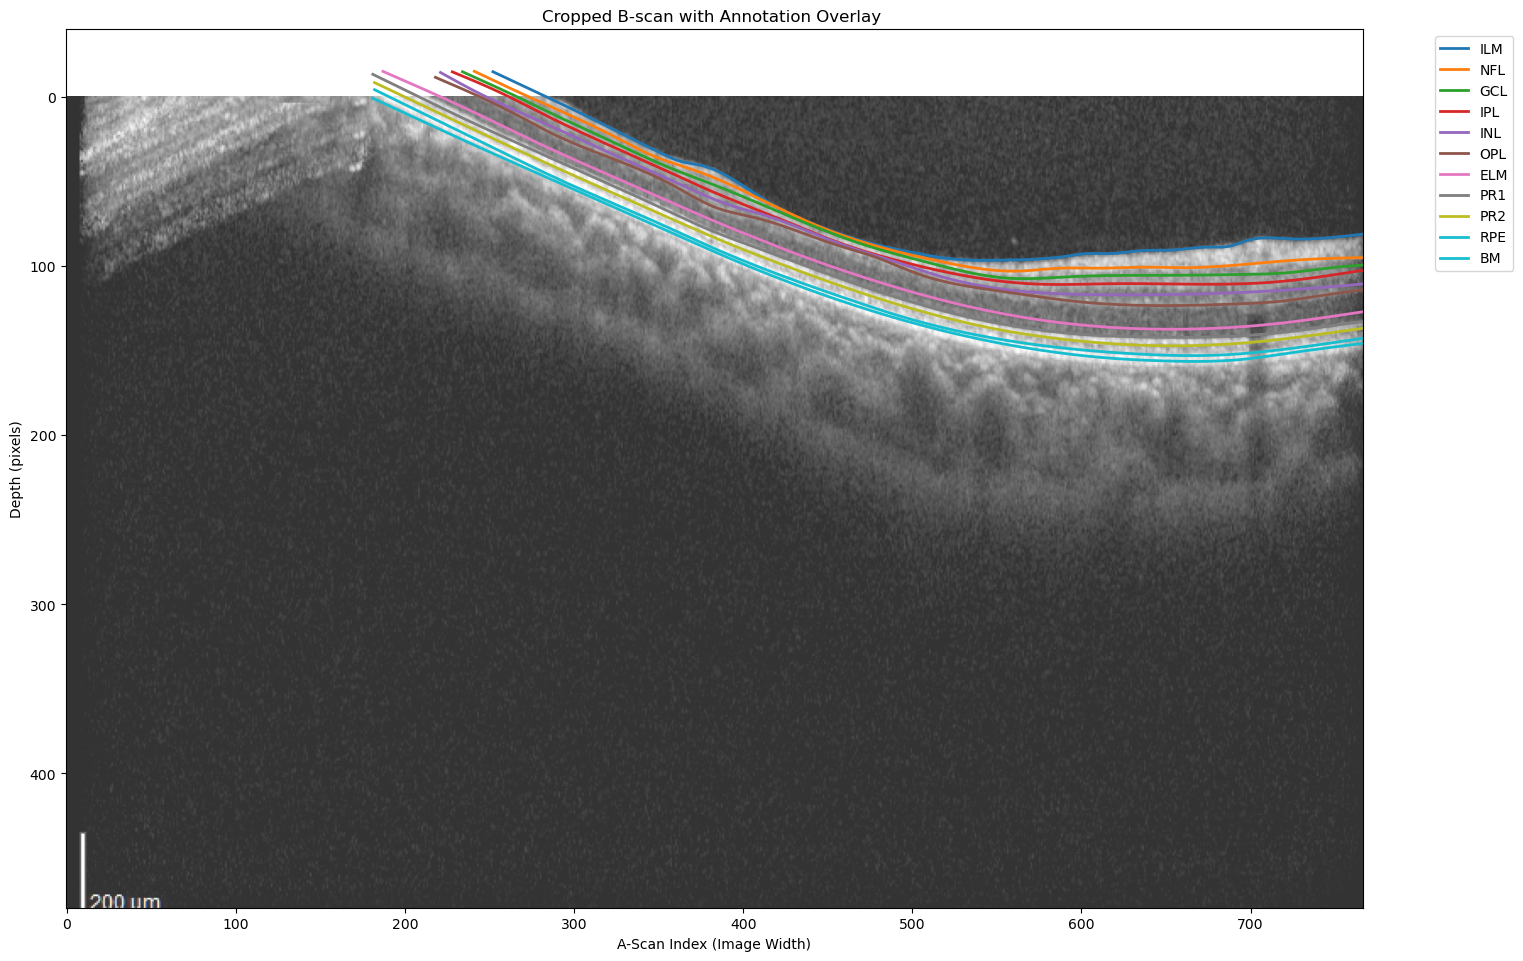

In [15]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/99_R_2_1000.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/99_R_2_1_Segm.xls'

image = crop_image(img_dir)
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=0)

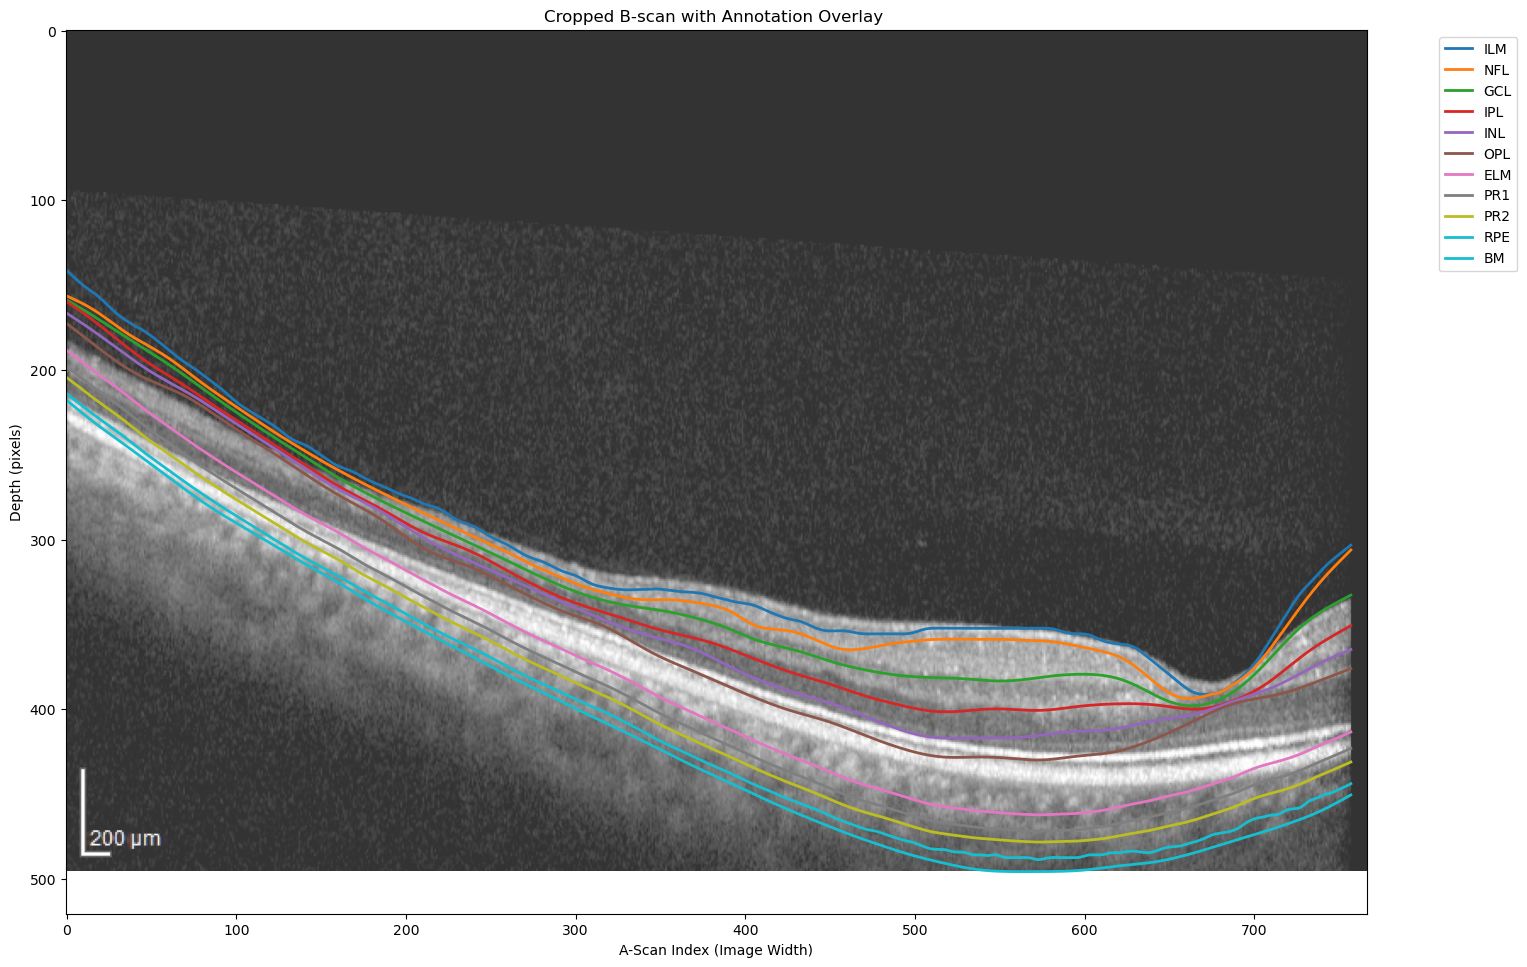

In [13]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/99_R_2_1015.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/99_R_2_1_Segm.xls'

image = crop_image(img_dir)
#NOTE: change the bscan_idx according to the image. Eg: image 1015, b_scan_idx should be 15
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=15, min_annotation=0000, max_annotation=1193636)

#### 3_R_4 PatientID, 0th and 15th b-scan

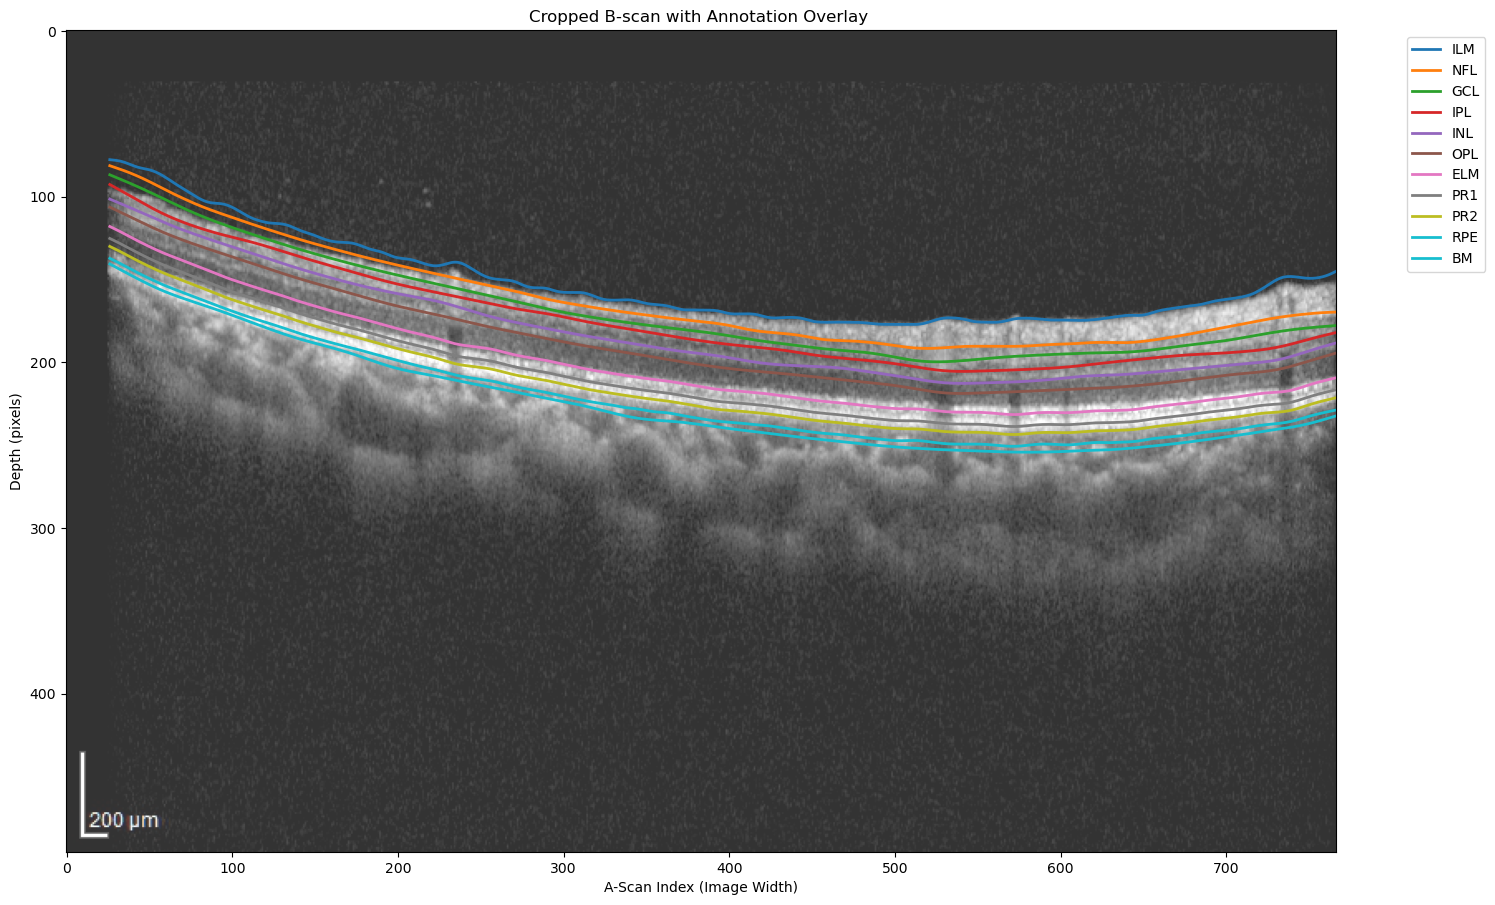

In [9]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/3_R_4_1000.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/3_R_4_1_Segm.xls'

image = crop_image(img_dir)
#NOTE: change the bscan_idx according to the image. Eg: image 1015, b_scan_idx should be 15
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=0, min_annotation=0000, max_annotation=1593636)

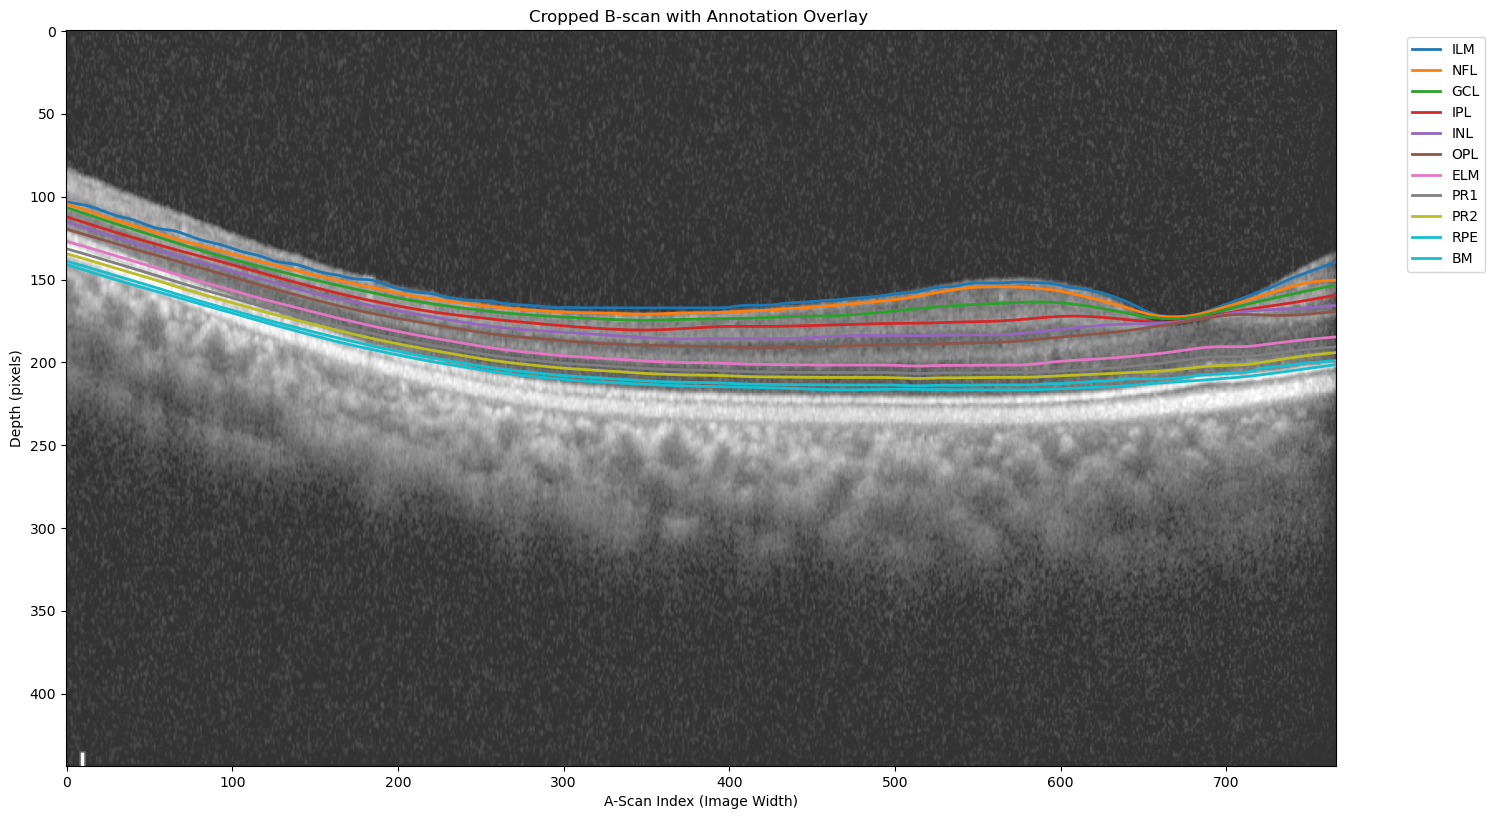

In [15]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/3_R_4_1015.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/3_R_4_1_Segm.xls'

image = crop_image(img_dir)
#NOTE: change the bscan_idx according to the image. Eg: image 1015, b_scan_idx should be 15
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=15, min_annotation=0000, max_annotation=2293636)

#### 106_L_1 PatientID, 0th and 15th b-scan

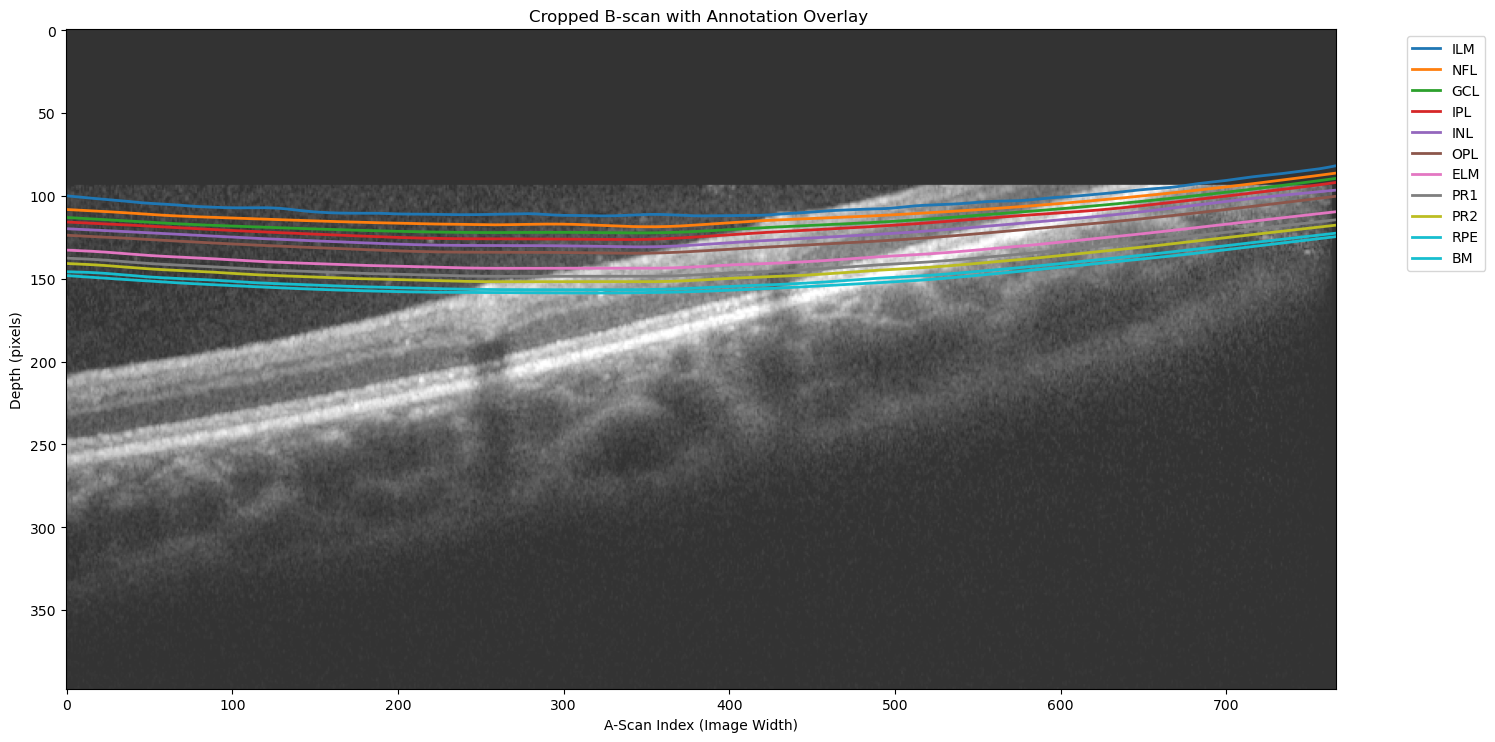

In [33]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/106_L_1000.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/106_L_1_Segm.xls'

image = crop_image(img_dir)
#NOTE: change the bscan_idx according to the image. Eg: image 1015, b_scan_idx should be 15
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=0)

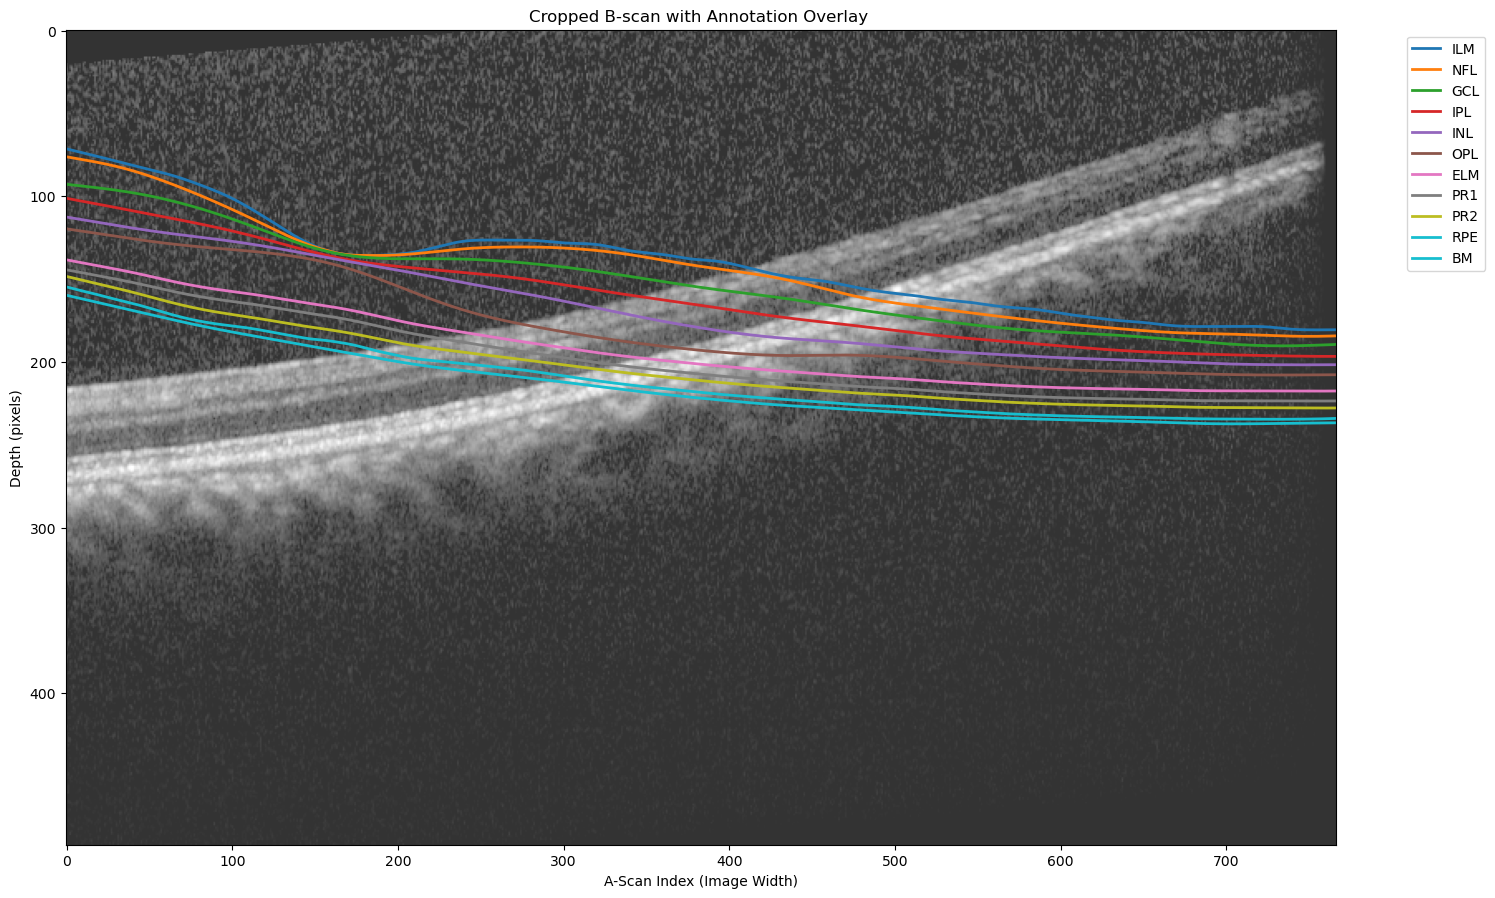

In [34]:
img_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/106_L_1015.jpg'
lyr_dir = '/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/106_L_1_Segm.xls'

image = crop_image(img_dir)
#NOTE: change the bscan_idx according to the image. Eg: image 1015, b_scan_idx should be 15
plot_layer_annotations_on_image(image, lyr_dir, bscan_idx=15)

In [11]:
import pandas as pd

# Read the XLS file as CSV (since it appears to be CSV format despite .xls extension)
df = pd.read_csv('/home/suraj/Git/SCR-Progression/Annotations-Test-Case/pairs/3_R_4_1_Segm.xls', sep=None, engine='python')

# Convert to JSON and save
df.to_json('/home/suraj/Git/SCR-Progression/Annotations-Test-Case/3_R_4_1_Segm.json', orient='records', indent=2)

print("Conversion completed successfully!")
print(f"JSON file saved to: /home/suraj/Git/SCR-Progression/Annotations-Test-Case/3_R_4_1_Segm.json")
print(f"DataFrame shape: {df.shape}")
print(f"First few rows:")
print(df.head())

Conversion completed successfully!
JSON file saved to: /home/suraj/Git/SCR-Progression/Annotations-Test-Case/3_R_4_1_Segm.json
DataFrame shape: (1053, 768)
First few rows:
  Lastname Firstname    DOB PatientID    Eye ImageID    ExamDate  \
0      NaN       NaN    NaN      3R41      R   18421  10/15/2020   
1    ILM.1     ILM.2  ILM.3     ILM.4  ILM.5   ILM.6       ILM.7   
2      NaN       NaN    NaN       NaN    NaN     NaN         NaN   
3      NaN       NaN    NaN       NaN    NaN     NaN         NaN   
4    NFL.1     NFL.2  NFL.3     NFL.4  NFL.5   NFL.6       NFL.7   

         ExamTime AQMVersion Quality  ... Unnamed: 758 Unnamed: 759  \
0  13:07:30 (UTC)   6.13.3.0      32  ...          NaN          NaN   
1           ILM.8      ILM.9  ILM.10  ...      ILM.759      ILM.760   
2             NaN        NaN     NaN  ...       477011       476139   
3             NaN        NaN     NaN  ...          NaN          NaN   
4           NFL.8      NFL.9  NFL.10  ...      NFL.759      NFL.

In [ ]:
s